In [225]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## Now, for the fun part.... Models and Predictions

In [309]:
filename = '../../pickled_data/df_to_open_in_note_2'
infile = open(filename, 'rb')
df = pickle.load(infile)

In [310]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,-0.673345,2,0,5,4.132122,4.007515,1.633154,1.625311,1.156881,7.520240
1,0.438255,1,5,4,4.152771,4.094511,1.989243,1.993339,1.539015,9.226608
2,0.285179,4,6,3,4.122446,4.094511,1.940179,1.948763,1.463255,8.614866
3,0.190620,2,5,2,4.128907,4.007515,1.922788,1.916923,1.444563,8.551403
4,0.553885,3,5,2,4.114311,4.094511,2.038620,2.036012,1.547563,9.301735


### We separate target `y` from features `X`

In [311]:
X = df.iloc[:,:-4]
y = df.iloc[:,-1]

In [312]:
print(X.head())
y.head()

      carat  cut  color  clarity     depth     table
0 -0.673345    2      0        5  4.132122  4.007515
1  0.438255    1      5        4  4.152771  4.094511
2  0.285179    4      6        3  4.122446  4.094511
3  0.190620    2      5        2  4.128907  4.007515
4  0.553885    3      5        2  4.114311  4.094511


0    7.520240
1    9.226608
2    8.614866
3    8.551403
4    9.301735
Name: price, dtype: float64

The `train_test_split` is set to split on 0.7 for train and 0.3 for test and the random state gives us concrete number to reference a random selection of rows so we get the same set of random each time we run the function. Apparently, `42` is just a reference to **Hitchikers's Guided to the Galaxy**. I should read it some day.

In [313]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression

<br>1) Import LinearRegression class from Sci-kit learn
<br>2) Create an object of LinearRegression model
<br>3) Fit the model to X_train and y_train
<br>4) Make predictions

In [314]:
lr = LinearRegression()

In [315]:
lr.fit(X_train,y_train)

LinearRegression()

In [316]:
y_pred = lr.predict(X_test)

In [317]:
print("Coef: ",lr.coef_)
print("MSE:  %.2f" %mean_squared_error(y_test, y_pred))
print("Coef of Determ (1 is perfect): %.2f" %r2_score(y_test, y_pred))
print("RMSE: %.2f" %math.sqrt(mean_squared_error(y_test, y_pred)))

Coef:  [ 1.79127871  0.00823043 -0.06108836  0.06478575 -1.18176124 -0.90533894]
MSE:  0.04
Coef of Determ (1 is perfect): 0.95
RMSE: 0.20


#### This could be great or terrible. It is very well fit...but...is it too fit....and it knows it.

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


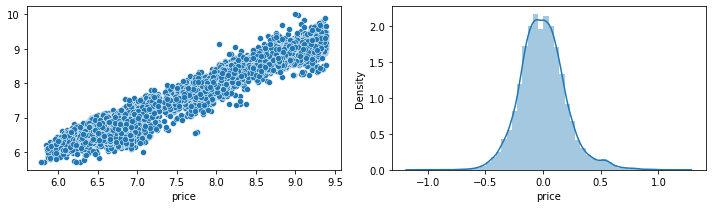

In [318]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
sns.scatterplot(x=y_test,y=y_pred, ax=ax1)
sns.distplot((y_test-y_pred),bins=50, ax=ax2)
plt.tight_layout()

In [319]:
# convert prices and predictions back to exp
y_pred2 = np.exp(y_pred)
y_test2 = np.exp(y_test)

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


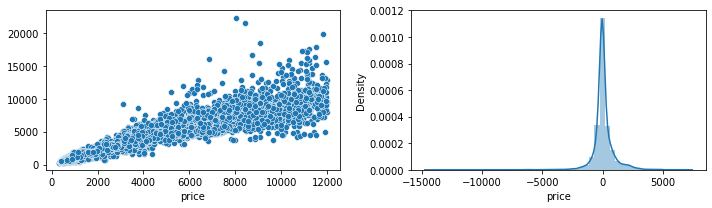

In [320]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
sns.scatterplot(x=y_test2,y=y_pred2, ax=ax1)
sns.distplot((y_test2-y_pred2),bins=50, ax=ax2)
plt.tight_layout()

In [322]:
print("Coef: ",lr.coef_)
print("MSE:  %.2f" %mean_squared_error(y_test2, y_pred2))
print("Coef of Determ (1 is perfect): %.2f" %r2_score(y_test2, y_pred2))
print("RMSE: %.2f" %math.sqrt(mean_squared_error(y_test2, y_pred2)))

Coef:  [ 1.79127871  0.00823043 -0.06108836  0.06478575 -1.18176124 -0.90533894]
MSE:  815665.51
Coef of Determ (1 is perfect): 0.89
RMSE: 903.14


# KNN

In [323]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [324]:
print("Coef: ",lr.coef_)
print("MSE:  %.2f" %mean_squared_error(y_test, y_pred))
print("Coef of Determ (1 is perfect): %.2f" %r2_score(y_test, y_pred))
print("RMSE: %.2f" %math.sqrt(mean_squared_error(y_test, y_pred)))

Coef:  [ 1.79127871  0.00823043 -0.06108836  0.06478575 -1.18176124 -0.90533894]
MSE:  0.02
Coef of Determ (1 is perfect): 0.98
RMSE: 0.13


/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


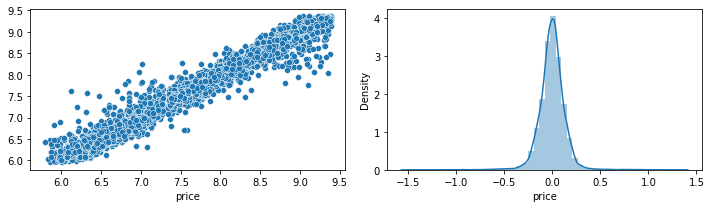

In [325]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
sns.scatterplot(x=y_test,y=y_pred, ax=ax1)
sns.distplot((y_test-y_pred),bins=50, ax=ax2)
plt.tight_layout()

In [326]:
# convert prices and predictions back to exp
y_pred2 = np.exp(y_pred)
y_test2 = np.exp(y_test)

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


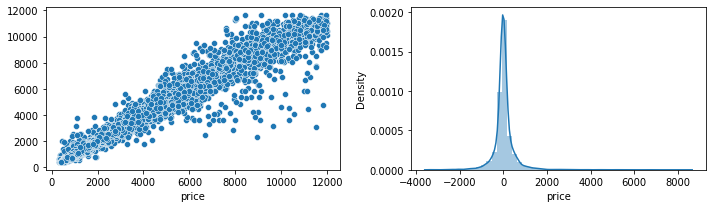

In [327]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
sns.scatterplot(x=y_test2,y=y_pred2, ax=ax1)
sns.distplot((y_test2-y_pred2),bins=50, ax=ax2)
plt.tight_layout()

In [328]:
print("Coef: ",lr.coef_)
print("MSE:  %.2f" %mean_squared_error(y_test2, y_pred2))
print("Coef of Determ (1 is perfect): %.2f" %r2_score(y_test2, y_pred2))
print("RMSE: %.2f" %math.sqrt(mean_squared_error(y_test2, y_pred2)))

Coef:  [ 1.79127871  0.00823043 -0.06108836  0.06478575 -1.18176124 -0.90533894]
MSE:  271808.87
Coef of Determ (1 is perfect): 0.96
RMSE: 521.35


# SVR

In [329]:
svm = SVR()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

In [330]:
print("Coef: ",lr.coef_)
print("MSE:  %.2f" %mean_squared_error(y_test, y_pred))
print("Coef of Determ (1 is perfect): %.2f" %r2_score(y_test, y_pred))
print("RMSE: %.2f" %math.sqrt(mean_squared_error(y_test, y_pred)))

Coef:  [ 1.79127871  0.00823043 -0.06108836  0.06478575 -1.18176124 -0.90533894]
MSE:  0.03
Coef of Determ (1 is perfect): 0.97
RMSE: 0.16


/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


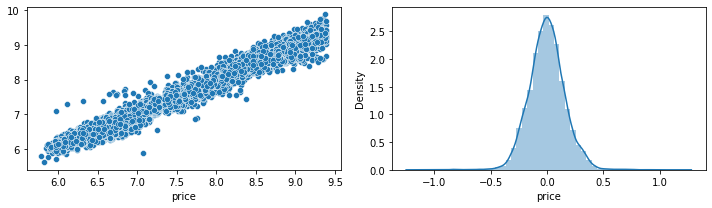

In [331]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
sns.scatterplot(x=y_test,y=y_pred, ax=ax1)
sns.distplot((y_test-y_pred),bins=50, ax=ax2)
plt.tight_layout()

In [332]:
# convert prices and predictions back to exp
y_pred2 = np.exp(y_pred)
y_test2 = np.exp(y_test)

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


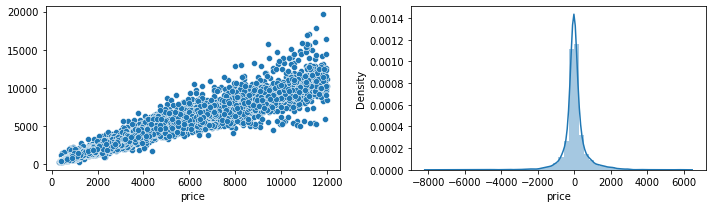

In [333]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
sns.scatterplot(x=y_test2,y=y_pred2, ax=ax1)
sns.distplot((y_test2-y_pred2),bins=50, ax=ax2)
plt.tight_layout()

In [334]:
print("Coef: ",lr.coef_)
print("MSE:  %.2f" %mean_squared_error(y_test2, y_pred2))
print("Coef of Determ (1 is perfect): %.2f" %r2_score(y_test2, y_pred2))
print("RMSE: %.2f" %math.sqrt(mean_squared_error(y_test2, y_pred2)))

Coef:  [ 1.79127871  0.00823043 -0.06108836  0.06478575 -1.18176124 -0.90533894]
MSE:  477035.34
Coef of Determ (1 is perfect): 0.94
RMSE: 690.68


# Random Forest

In [335]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [336]:
print("Coef: ",lr.coef_)
print("MSE:  %.2f" %mean_squared_error(y_test, y_pred))
print("Coef of Determ (1 is perfect): %.2f" %r2_score(y_test, y_pred))
print("RMSE: %.2f" %math.sqrt(mean_squared_error(y_test, y_pred)))

Coef:  [ 1.79127871  0.00823043 -0.06108836  0.06478575 -1.18176124 -0.90533894]
MSE:  0.01
Coef of Determ (1 is perfect): 0.99
RMSE: 0.11


/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


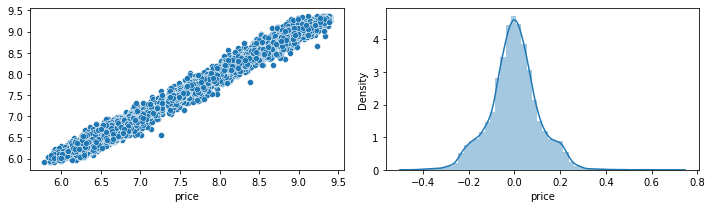

In [337]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
sns.scatterplot(x=y_test,y=y_pred, ax=ax1)
sns.distplot((y_test-y_pred),bins=50, ax=ax2)
plt.tight_layout()

In [338]:
# convert prices and predictions back to exp
y_pred2 = np.exp(y_pred)
y_test2 = np.exp(y_test)

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


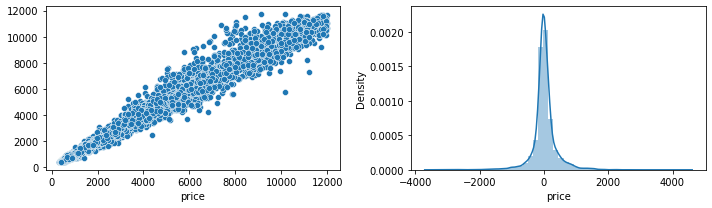

In [339]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
sns.scatterplot(x=y_test2,y=y_pred2, ax=ax1)
sns.distplot((y_test2-y_pred2),bins=50, ax=ax2)
plt.tight_layout()

In [340]:
print("Coef: ",lr.coef_)
print("MSE:  %.2f" %mean_squared_error(y_test2, y_pred2))
print("Coef of Determ (1 is perfect): %.2f" %r2_score(y_test2, y_pred2))
print("RMSE: %.2f" %math.sqrt(mean_squared_error(y_test2, y_pred2)))

Coef:  [ 1.79127871  0.00823043 -0.06108836  0.06478575 -1.18176124 -0.90533894]
MSE:  153153.29
Coef of Determ (1 is perfect): 0.98
RMSE: 391.35


-------
# We are going to predict

In [288]:
dfpredtest = pd.read_csv('../../diamond_data/predict.csv')

In [289]:
dfpredtest.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.45,Premium,E,SI1,62.8,58.0,4.88,4.84,3.05
1,1,1.23,Ideal,H,SI1,61.0,56.0,6.96,6.92,4.23
2,2,0.33,Ideal,I,IF,61.8,55.0,4.46,4.47,2.76
3,3,0.51,Premium,D,VS2,58.0,60.0,5.29,5.26,3.06
4,4,0.40,Premium,E,VS2,62.2,59.0,4.71,4.74,2.94


In [290]:
dfpt = dfpredtest.iloc[:,1:-3]

In [291]:
dfpt.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
dtype: int64

### Preprocessing steps:

<br>1) Eliminiate outliers - **but we are going to skip this step**
<br>2) Convert categorical values to numerical values
<br>3) Log transform
<br>4) Apply RandomForest
<br>5) Add id back to y_pred
<br>6) Submit to kaggle

# 2) Convert categories

In [292]:
linear_vars = dfpt.select_dtypes(include=[np.number]).columns
list(linear_vars)

['carat', 'depth', 'table']

In [293]:
def convert_cats(df):
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    
    ### Select categorical features by excluding the np.numbers dtypes from the list of categories
    cats = list(df.select_dtypes(exclude=(np.number)).columns)
    
    # cats_index will be populated by the indices of each column based on their name
    cats_index = [df.columns.get_loc(col) for col in cats]
    
    # Use the real indices to reference the columns to transform
    for i in cats_index:
        df.iloc[:,i] = le.fit_transform(df.iloc[:,i])

In [294]:
convert_cats(dfpt)

In [295]:
dfpt.head()

,carat,cut,color,clarity,depth,table
0,0.45,3,1,2,62.8,58.0
1,1.23,2,4,2,61.0,56.0
2,0.33,2,5,1,61.8,55.0
3,0.51,3,0,5,58.0,60.0
4,0.40,3,1,5,62.2,59.0


# 3) Log transform

In order to do log transform we must eliminate the Zeros sothat we dont get any errors

In [296]:
print('0 values ->', 0 in df.values)
df[linear_vars] = df[linear_vars] + 0.01
print('Filled 0 with 0.01. Now 0 values ->', 0 in df.values)

0 values -> True
Filled 0 with 0.01. Now 0 values -> True


In [297]:
def convertfeatures2log(df, listvars):
    for var in listvars:
        df[var] = np.log(df[var])

In [298]:
convertfeatures2log(dfpt, linear_vars)

# 4) Apply RandomForest

In [299]:
y_pred = rf.predict(dfpt)

# 5) Add id back to y_pred

In [300]:
y_pred = np.exp(y_pred)

In [301]:
type(y_pred)

numpy.ndarray

In [302]:
type(dfpredtest['id'])

pandas.core.series.Series

In [303]:
df_pred = pd.concat([dfpredtest['id'], pd.DataFrame(y_pred)], axis=1, ignore_index=True)

In [304]:
df_pred.head()

,0,1
0,0,974.527493
1,1,6332.760521
2,2,668.788777
3,3,1790.821324
4,4,968.567456


In [305]:
df_pred = df_pred.rename(columns={0: "id", 1: "price"})

In [306]:
df_pred.head()

,id,price
0,0,974.527493
1,1,6332.760521
2,2,668.788777
3,3,1790.821324
4,4,968.567456


In [307]:
df_pred.to_csv("../../predictions/third.csv", index=False)

# Don't drop the outliers on page 1 and the train the undropped df here